<a href="https://colab.research.google.com/github/frizwankhan/SmartKnowerInternship/blob/main/MinorProjectRizwan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This Mini Project Belongs to Mohamed Rizwan Khan(mohamedrizwaan37@gmail.com)

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from skimage.transform import resize

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
dir = "/content/drive/MyDrive/SmartKnowerInternship/MiniProject/Data"

categories = ["cat", "elephant"]
unscaled_images = []
scaled_images = []
flattened_images = []
target = []

for i in categories:
  category_dir = os.path.join(dir, i)
  for img_name in os.listdir(category_dir):
    img_path = os.path.join(category_dir, img_name)
    img = cv2.imread(img_path)
    unscaled_images.append(img)
    scaled_img = resize(img, (100,100,3))
    scaled_images.append(scaled_img)
    flattened_images.append(scaled_img.flatten())
    target.append(i)


In [ ]:
flattened_images = np.array(flattened_images)
target = np.array(target)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(flattened_images, target, random_state=5, stratify=target)

In [ ]:
param_grid = {
    "C": [0.1, 1, 10,100],
    "kernel": ["rbf", "linear", "poly"],
    "gamma": [0.1, 10 ,100, 1000]
}

clf = SVC(probability=True)

In [ ]:
grid_search = GridSearchCV(clf, param_grid, cv=5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 10, 100, 1000],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(f'score on test set is {grid_search.score(X_test, y_test)}')

score on test set is 0.7142857142857143


In [ ]:
print(f'Best parameters for SVC are {grid_search.best_params_}')

Best parameters for SVC are {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.561030,0.001606,0.028722,0.000371,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.583333,0.500000,0.500000,0.50,0.500000,0.516667,0.033333,45
1,0.529421,0.008374,0.024253,0.001635,0.1,0.1,linear,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",0.666667,0.833333,0.916667,0.75,0.833333,0.800000,0.084984,1
2,0.528215,0.010472,0.023619,0.000856,0.1,0.1,poly,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",0.666667,0.750000,0.750000,0.75,0.833333,0.750000,0.052705,17
3,0.571518,0.004579,0.029936,0.001030,0.1,10,rbf,"{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}",0.583333,0.500000,0.500000,0.50,0.500000,0.516667,0.033333,45
4,0.526933,0.011758,0.024090,0.001912,0.1,10,linear,"{'C': 0.1, 'gamma': 10, 'kernel': 'linear'}",0.666667,0.833333,0.916667,0.75,0.833333,0.800000,0.084984,1


In [ ]:
print(f'Accuracy score is {accuracy_score(y_test, grid_search.predict(X_test))}')
print(f'Confusion Matrix: \n {confusion_matrix(y_test, grid_search.predict(X_test))}')
print(f'Classification report: \n {classification_report(y_test, grid_search.predict(X_test))}')

Accuracy score is 0.7142857142857143
Confusion Matrix: 
 [[ 5  5]
 [ 1 10]]
Classification report: 
               precision    recall  f1-score   support

         cat       0.83      0.50      0.62        10
    elephant       0.67      0.91      0.77        11

    accuracy                           0.71        21
   macro avg       0.75      0.70      0.70        21
weighted avg       0.75      0.71      0.70        21



Saving download (5).jpg to download (5).jpg
The uploaded image is a elephant


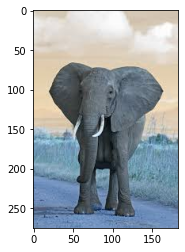

In [ ]:
from google.colab import files
uploaded = files.upload()

img_path = uploaded.keys()
img_path = os.path.join('/content', list(img_path)[0])
img = cv2.imread(img_path)
plt.imshow(img)
img = resize(img, (100,100,3)).flatten()

img = np.array(img)
img = np.reshape(img, (1,-1))
print(f'The uploaded image is a {grid_search.predict(img)[0]}')